In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')

In [32]:
df.shape

(11251, 15)

In [33]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [35]:
# dropo unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [36]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [37]:
# drop null values 
df.dropna(inplace=True)

In [38]:
# Change datatype
df['Amount'] = df['Amount'].astype('int')

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [40]:
# describe() method returns description of the data in the DataFrame (i.e. count,mean,std,etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

#### Gender

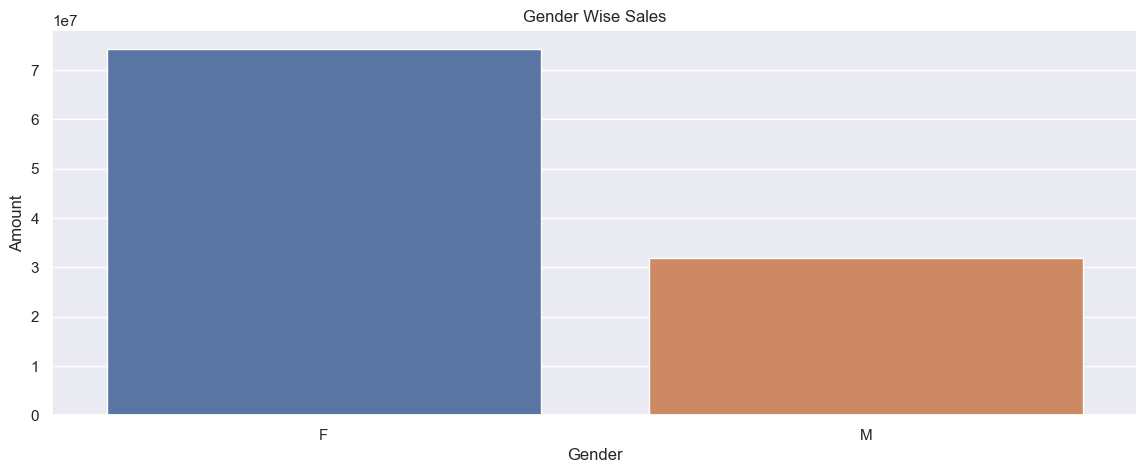

In [41]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen,hue='Gender', palette='deep')
plt.title("Gender Wise Sales")
plt.show()

###### From above we can see that most of the buyers are Females and even the purchasing power of are greater than men 

#### Age 

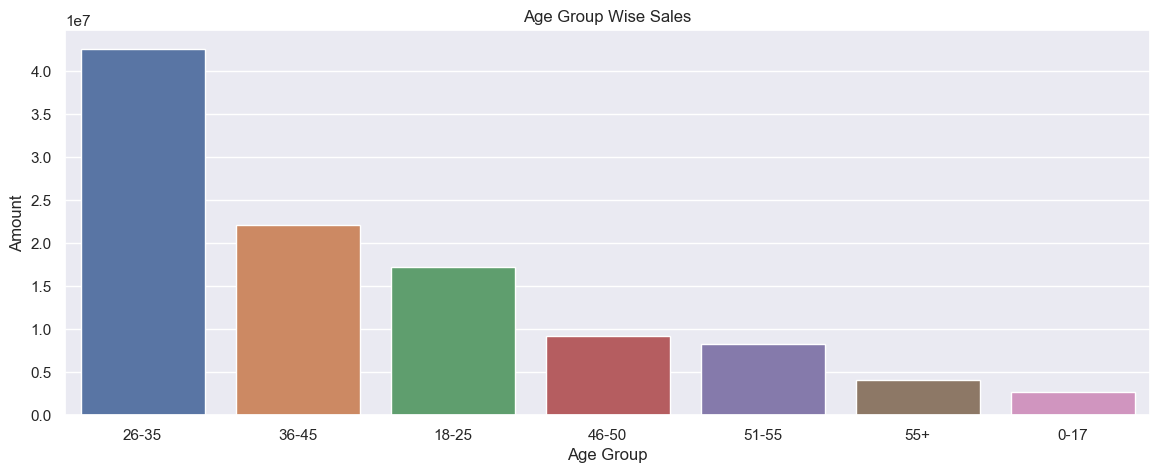

In [42]:
# Total Amount vs Age Group 
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_age,x='Age Group',y='Amount', hue='Age Group',palette='deep')
plt.title("Age Group Wise Sales")
plt.show()

###### From above graph we can see that most of buyers are of age group between 26-35 

#### State 

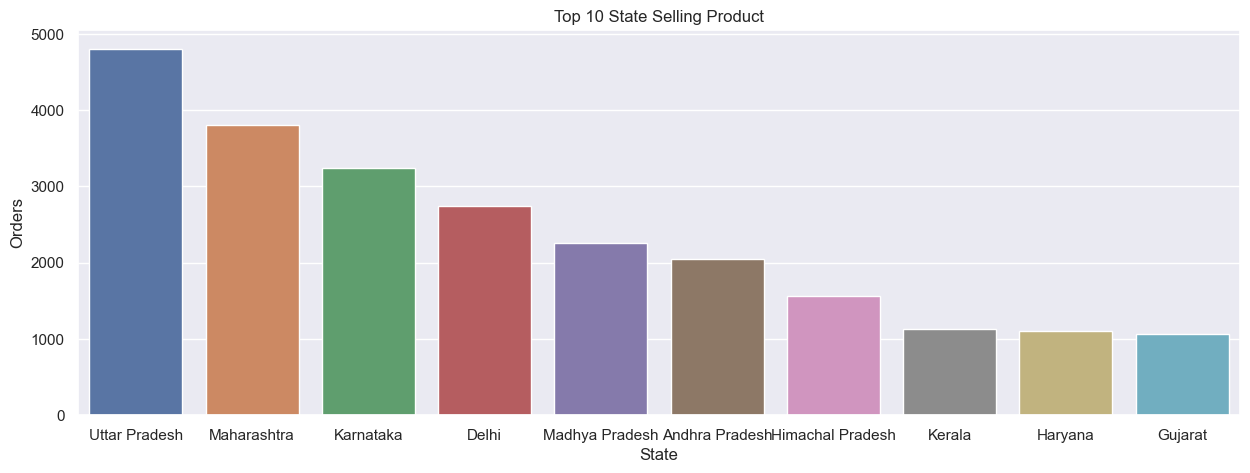

In [43]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x="State", y ="Orders",hue='State',palette="deep")
plt.title('Top 10 State Selling Product')
plt.show()

###### From above graphs we can see that unexpectaly most of the orders are from Uter Pradesh, Maharashtra and Karnataka respectively but total sales/amount  in from UP,Karnataka and then Maharashtra

#### Marital Status

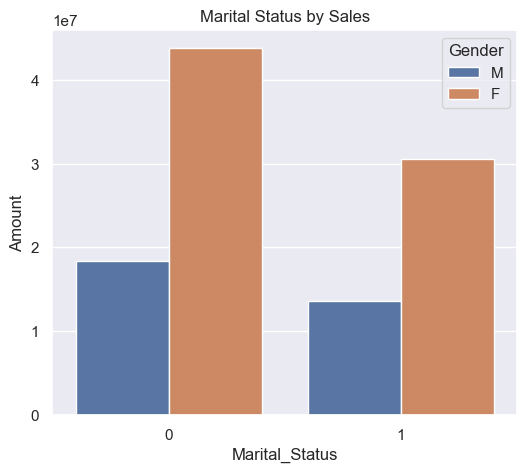

In [44]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)

sns.set(rc={"figure.figsize":(6,5)})
sns.barplot(data=sales_state, x="Marital_Status",y="Amount", hue='Gender')
plt.title("Marital Status by Sales")
plt.show()

###### From above graphs we can see that buyers are married womans ther are high purchasing power 

#### Occupation

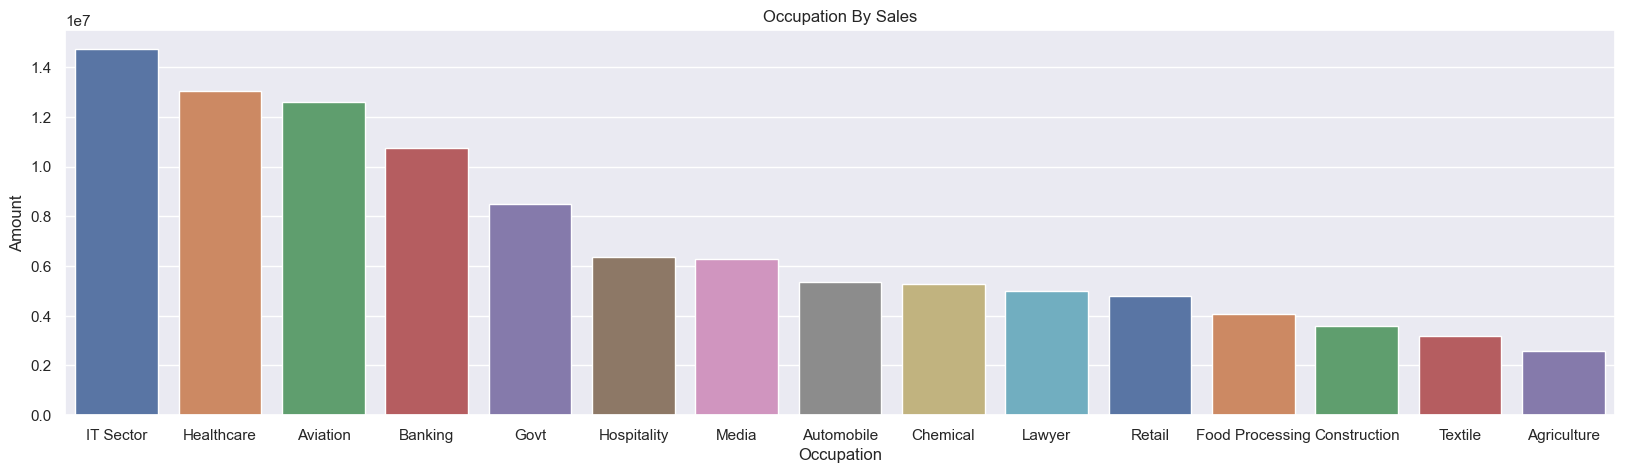

In [45]:
occu_sales = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x="Occupation",y="Amount", data=occu_sales,hue='Occupation',palette='deep')
plt.title("Occupation By Sales")
plt.show()

##### From above graphs we can see that most of the buyers are working IT Sector, Healthcare and Aviaton sector

#### Product Category

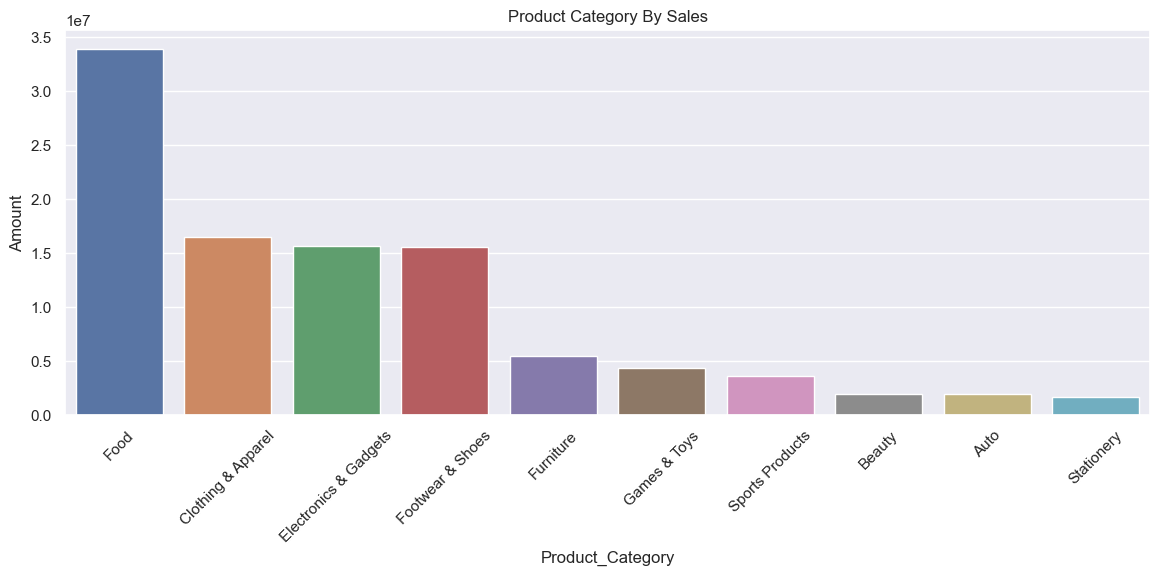

In [46]:
product_sales = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(data=product_sales, x='Product_Category',y='Amount',hue='Product_Category')
plt.title("Product Category By Sales")
plt.xticks(rotation=45)
plt.show()

##### From above graphs we can see that most of the sold products are from Food, Footwear adn Electronics category 